# Assignment 3B
## Anuj Jain

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import seaborn as sns

## Importing data

In [5]:
dataBPC = pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Assign 3/wpbc.csv', index_col='ID number') 

In [6]:
dataBPC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 119513 to 947489
Data columns (total 34 columns):
Outcome                198 non-null object
Time                   198 non-null int64
radius 1               198 non-null float64
texture 1              198 non-null float64
perimeter 1            198 non-null float64
area 1                 198 non-null float64
smoothness 1           198 non-null float64
compactness 1          198 non-null float64
concavity 1            198 non-null float64
concave points 1       198 non-null float64
symmetry 1             198 non-null float64
fractal dimension 1    198 non-null float64
radius 2               198 non-null float64
texture 2              198 non-null float64
perimeter 2            198 non-null float64
area 2                 198 non-null float64
smoothness 2           198 non-null float64
compactness 2          198 non-null float64
concavity 2            198 non-null float64
concave points 2       198 non-null float64
symmetry 2

In [7]:
#### Lymph node has 4 missing values

### Filling missing values

In [8]:
dataBPC['Lymph node status'].fillna(dataBPC['Lymph node status'].median(), inplace = True)

# Question 1
### Selecting required columns

In [9]:
X1 = dataBPC.loc[:,'radius 1':'Lymph node status']
y1 = dataBPC['Outcome']

## 1a)

### Making function to calculate SSE for each cluster

In [10]:
def SSEPerCluster(centers, labels, X):
    SSEOfEachCluster=[]
    for i in range(len(centers)):
        SSE = np.sum(np.sum((X[labels==i] - centers[i])**2))
        SSEOfEachCluster.append(SSE)
        print('SSE of cluster ' + str(i) + ' is: \t' + str(SSE))
    return SSEOfEachCluster

### Running K means 3 times

In [11]:
n_clusters = 4

In [12]:
kmeans1 = KMeans(n_clusters=n_clusters,init='random', random_state=20).fit(X1)
kmeans1.sse = SSEPerCluster(kmeans1.cluster_centers_, kmeans1.labels_, X1)
print('Total SSE is: \t' + str(kmeans1.inertia_))
print('\n Cluster centers are:\n' + str(kmeans1.cluster_centers_))

SSE of cluster 0 is: 	3095911.197061971
SSE of cluster 1 is: 	3395996.8899589726
SSE of cluster 2 is: 	3024037.491042756
SSE of cluster 3 is: 	2452939.2794283126
Total SSE is: 	11968884.8575

 Cluster centers are:
[[  2.06943590e+01   2.27648718e+01   1.37466667e+02   1.33373333e+03
    1.02547179e-01   1.63605641e-01   2.03023333e-01   1.13464359e-01
    1.97112821e-01   6.11325641e-02   8.00620513e-01   1.25430769e+00
    5.66735897e+00   1.05393077e+02   6.46964103e-03   3.36861538e-02
    4.45279487e-02   1.60099487e-02   2.03479487e-02   3.91723077e-03
    2.55200000e+01   2.98020513e+01   1.71187179e+02   1.99917949e+03
    1.39948974e-01   3.88051282e-01   4.85079487e-01   2.06971282e-01
    3.24574359e-01   8.71279487e-02   3.43589744e+00   4.35897436e+00]
 [  1.80736111e+01   2.21644444e+01   1.18891667e+02   1.01715972e+03
    1.00192778e-01   1.35127222e-01   1.49740694e-01   8.78423611e-02
    1.91263889e-01   6.05190278e-02   6.35109722e-01   1.31407222e+00
    4.42997222e

In [57]:
kmeans2 = KMeans(n_clusters=n_clusters,init='random', random_state=10).fit(X1)
kmeans2.sse = SSEPerCluster(kmeans2.cluster_centers_, kmeans2.labels_, X1)
print('Total SSE is: \t' + str(kmeans2.inertia_))
print('\n Cluster centers are:\n' + str(kmeans2.cluster_centers_))

SSE of cluster 0 is: 	2494725.2375164237
SSE of cluster 1 is: 	2773885.1224440215
SSE of cluster 2 is: 	2795136.2579302127
SSE of cluster 3 is: 	3878789.558271524
Total SSE is: 	11942536.1762

 Cluster centers are:
[[  1.41723611e+01   2.16708333e+01   9.32708333e+01   6.25316667e+02
    1.05880278e-01   1.39142639e-01   1.31299167e-01   6.65175000e-02
    1.94956944e-01   6.65120833e-02   3.98543056e-01   1.22164167e+00
    2.87844444e+00   3.52502778e+01   6.92375000e-03   3.15364167e-02
    3.86712500e-02   1.38303056e-02   2.08785972e-02   4.12936111e-03
    1.67775000e+01   3.02890278e+01   1.12335556e+02   8.66080556e+02
    1.53324583e-01   3.99206389e-01   4.45023333e-01   1.64510417e-01
    3.41261111e-01   1.01010139e-01   2.31805556e+00   2.98611111e+00]
 [  1.77074627e+01   2.24034328e+01   1.16374627e+02   9.75891045e+02
    1.00082239e-01   1.32492985e-01   1.43834627e-01   8.39279104e-02
    1.89725373e-01   6.05682090e-02   6.09897015e-01   1.33902836e+00
    4.24725373

In [55]:
kmeans3 = KMeans(n_clusters=n_clusters, init='random', random_state=None).fit(X1)
kmeans3.sse = SSEPerCluster(kmeans2.cluster_centers_, kmeans2.labels_, X1)
print('Total SSE is: \t' + str(kmeans2.inertia_))
print('\n Cluster centers are:\n' + str(kmeans3.cluster_centers_))

SSE of cluster 0 is: 	3641169.4862160245
SSE of cluster 1 is: 	3138086.1676194593
SSE of cluster 2 is: 	3456453.3035555566
SSE of cluster 3 is: 	1761757.7451936712
Total SSE is: 	11997466.7026

 Cluster centers are:
[[  1.78480597e+01   2.22656716e+01   1.17350746e+02   9.91886567e+02
    1.00178955e-01   1.34083731e-01   1.47061642e-01   8.59271642e-02
    1.91102985e-01   6.06619403e-02   6.29235821e-01   1.32895821e+00
    4.36495522e+00   7.10588060e+01   6.67104478e-03   3.00116119e-02
    4.03868657e-02   1.57373881e-02   2.09181045e-02   3.99294030e-03
    2.12870149e+01   2.98356716e+01   1.40994030e+02   1.38655224e+03
    1.38106418e-01   3.24928358e-01   4.03122537e-01   1.73323134e-01
    3.10410448e-01   8.50255224e-02   3.03432836e+00   2.92537313e+00]
 [  2.35563636e+01   2.46300000e+01   1.56118182e+02   1.74590909e+03
    1.01784545e-01   1.58554545e-01   2.21609091e-01   1.34490909e-01
    1.84372727e-01   5.93345455e-02   1.12993636e+00   1.27262727e+00
    7.7486363

## 1 b) Selecting the best of the above 3 clustering

In [58]:
kmeans = [kmeans1, kmeans2, kmeans3]
SSEValues = [kmeans1.inertia_, kmeans2.inertia_, kmeans3.inertia_]
print('SSE values for all three clusters are:\n'+ str(SSEValues))
bestSSEValueIndex = SSEValues.index(min(SSEValues))
print('\nBest cluster is: Cluster '+ str(bestSSEValueIndex+1))
bestKmeans = kmeans[bestSSEValueIndex]
print('Minimum value of SSE for best clustering is: \t' + str(min(SSEValues)))
clusterLabels = bestKmeans.labels_
clusterCenters = bestKmeans.cluster_centers_

SSE values for all three clusters are:
[11968884.857492009, 11942536.17616218, 11950932.50960171]

Best cluster is: Cluster 2
Minimum value of SSE for best clustering is: 	11942536.1762


### We have selected the cluster having the minimun value of SSE

## 1 c)

In [59]:
AvgSilhouetteScoreOfCluster = silhouette_score(X1, clusterLabels)
print('Average value of Silhouette of all the sample points is:\t'+ str(AvgSilhouetteScoreOfCluster))

Average value of Silhouette of all the sample points is:	0.497192846249


### Plotting silhouette of each sample

In [60]:
silhouettePerSample = silhouette_samples(X1, clusterLabels)

Different colors shows samples of different clusters


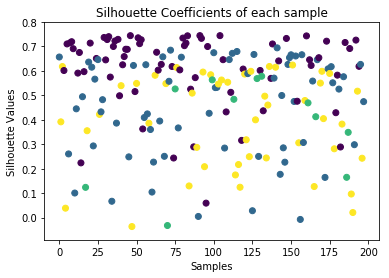

In [62]:
%matplotlib inline
plt.scatter(range(len(X1)),silhouettePerSample, c=clusterLabels)
plt.figsize = (25,20)
plt.xlabel("Samples")
plt.ylabel("Silhouette Values")
plt.title("Silhouette Coefficients of each sample")
print('Different colors shows samples of different clusters')

##  Computing the average Silhouette coefficient for each cluster 

In [63]:
silhouettePerCluster = []
for i in range(n_clusters):
    cluster_samples = silhouettePerSample[clusterLabels == i]
    avg_cluster_silhouette = np.sum(cluster_samples, axis=0)/len(cluster_samples)
    silhouettePerCluster.append(avg_cluster_silhouette)
    print("Silhoutte Coefficient for cluster "+str(i)+" = "+str(avg_cluster_silhouette))

Silhoutte Coefficient for cluster 0 = 0.613225962229
Silhoutte Coefficient for cluster 1 = 0.459565404807
Silhoutte Coefficient for cluster 2 = 0.382253144675
Silhoutte Coefficient for cluster 3 = 0.40200515757


Text(0.5,1,'Silhouette Coefficients of different clusters')

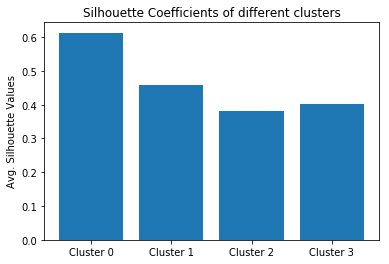

In [64]:
%matplotlib inline
plt.bar(range(n_clusters),silhouettePerCluster)
plt.xticks(range(n_clusters), ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.figsize = (25,20)
plt.ylabel("Avg. Silhouette Values")
plt.title("Silhouette Coefficients of different clusters")

## 1 d) Assigning Lable to each cluster

### Defining function to count lables of data points in the cluster and the assign majority class to that cluster

In [68]:
cluster_Class = []
def setLabelToEachCluster():
    sse = bestKmeans.sse
    for i in range(n_clusters):
        print('\nCluster ' + str(i))
        labels = (y1[clusterLabels == i]).value_counts()
        print('Class assigned to cluster ' + str(i) + ' is: \t' + str(labels.idxmax()))
        print('No. of \'N\' and \'R\' labels: ' + '\n' + str(labels))
        cluster_Class.append(labels.idxmax())
        fraction = labels.max()/(labels.max()+labels.min())
        print('Fraction of points that has the class label: \t'+ str(fraction))
        print('\nCluster center: \n' + str(clusterCenters[i]))
        print('Cluster SSE: \t' + str(sse[i])+ '\n\n')
        

#### Reporting the class label,  the fraction of points that have the class label, cluster center and its SSE

In [69]:
setLabelToEachCluster()


Cluster 0
Class assigned to cluster 0 is: 	N
No. of 'N' and 'R' labels: 
N    61
R    11
Name: Outcome, dtype: int64
Fraction of points that has the class label: 	0.847222222222

Cluster center: 
[  1.41723611e+01   2.16708333e+01   9.32708333e+01   6.25316667e+02
   1.05880278e-01   1.39142639e-01   1.31299167e-01   6.65175000e-02
   1.94956944e-01   6.65120833e-02   3.98543056e-01   1.22164167e+00
   2.87844444e+00   3.52502778e+01   6.92375000e-03   3.15364167e-02
   3.86712500e-02   1.38303056e-02   2.08785972e-02   4.12936111e-03
   1.67775000e+01   3.02890278e+01   1.12335556e+02   8.66080556e+02
   1.53324583e-01   3.99206389e-01   4.45023333e-01   1.64510417e-01
   3.41261111e-01   1.01010139e-01   2.31805556e+00   2.98611111e+00]
Cluster SSE: 	2494725.2375164237



Cluster 1
Class assigned to cluster 1 is: 	N
No. of 'N' and 'R' labels: 
N    49
R    18
Name: Outcome, dtype: int64
Fraction of points that has the class label: 	0.731343283582

Cluster center: 
[  1.77074627e+01 

## 1 e)

In [27]:
Xtest = X1

### Function to predict class for each test sample

In [28]:
def predCluster(x,centers):
    dist = np.sum((centers - np.array(x))**2, axis=1)
    dist = dist.tolist()
    index = dist.index(min(dist))  
    return index
        
def predClass(X):
    yPred=[]
    for i in range(len(X)):
        cluster_assigned = predCluster(X[i:i+1], clusterCenters)
        yPred.append(cluster_Class[cluster_assigned])
    return yPred    

In [29]:
yPred = predClass(Xtest)

### Making confusion matrix

In [35]:
ab =confusion_matrix(y1, yPred)

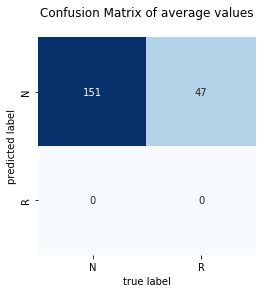

In [34]:
sns.heatmap(ab.T, square=True, annot=True, cbar=False,
                    xticklabels=['N','R'], yticklabels=['N', 'R'], cmap='Blues', fmt='g')
plt.xlabel('true label')
plt.ylabel('predi
           cted label');
plt.title('Confusion Matrix of average values\n')
plt.show()

###  Computing accuracy, precision and recall values.

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y1, yPred))
report = precision_recall_fscore_support(y1, yPred)
accuracy = accuracy_score(y1, yPred)

print('\nAccuracy: \t ' + str(accuracy))

             precision    recall  f1-score   support

          N       0.76      1.00      0.87       151
          R       0.00      0.00      0.00        47

avg / total       0.58      0.76      0.66       198


Accuracy: 	 0.762626262626


/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 1 f) Comparing the performance results

### Classification report of decision tree made in HW3 Q1

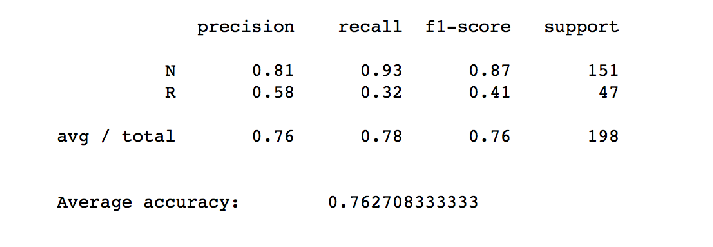

In [75]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import matplotlib.image as mpimg
plt.figure(figsize=(12,8))
img = mpimg.imread('/Users/user/Desktop/' +'Classification.png')
plt.axis('off')
plt.imshow(img)
plt.show()

## By Comparing Classification reports for both the models
### Accuracy: We are getting same accuracy for both the models
### Precision: Presion value for both the classes are better in Desicion tree model
### Recall: Clustering has better recall value for class N but Decision tree has better recall value for class R

# Question 2

### Loading white and red wine data

In [258]:
dataWWQ = pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Assign 3/winequality-white.csv')
dataRWQ = pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Assign 3/winequality-red.csv')

### combining data 

In [260]:
total_data = pd.concat([dataWWQ, dataRWQ], axis=0)

In [261]:
X2 = total_data.loc[:,'fixed acidity':'alcohol']
y2 = total_data.loc[:,'quality']

### Selecting minimum value of SSE for 3 run of each K 

In [267]:
k_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
SSE_values = []
min_SSE= []
for i in k_values:
    print("For K = " + str(i) + " cluster centers:")
    for j in range(3):
        clustering = KMeans(n_clusters=i, init='random').fit(X2,y2)
        SSE = clustering.inertia_
        SSE_values.append(SSE)
        minSSE = min(SSE_values)
    min_SSE.append(minSSE)
    print("Minimum value of SSE is: \t"+ str(minSSE) + "\n")    

For K = 3 cluster centers:
Minimum value of SSE is: 	4331571.93104

For K = 4 cluster centers:
Minimum value of SSE is: 	3038823.78057

For K = 5 cluster centers:
Minimum value of SSE is: 	2394092.53615

For K = 6 cluster centers:
Minimum value of SSE is: 	2041431.89344

For K = 7 cluster centers:
Minimum value of SSE is: 	1796413.82422

For K = 8 cluster centers:
Minimum value of SSE is: 	1623753.59344

For K = 9 cluster centers:
Minimum value of SSE is: 	1482987.44801

For K = 10 cluster centers:
Minimum value of SSE is: 	1367115.00678

For K = 11 cluster centers:
Minimum value of SSE is: 	1267254.37211

For K = 12 cluster centers:
Minimum value of SSE is: 	1161056.95271

For K = 13 cluster centers:
Minimum value of SSE is: 	1092122.46367

For K = 14 cluster centers:
Minimum value of SSE is: 	1023003.13077



## Ploting SSE values

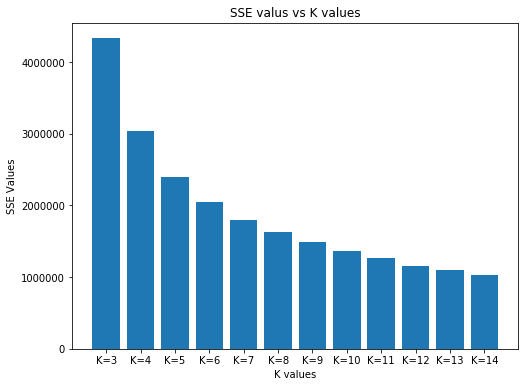

In [268]:
plt.figure(figsize = (8,6))
plt.bar(np.arange(12),min_SSE)
plt.xticks(np.arange(12), ['K=3', 'K=4', 'K=5', 'K=6', 'K=7', 'K=8', 'K=9', 'K=10', 'K=11', 'K=12', 'K=13', 'K=14'])
plt.xlabel("K values")
plt.ylabel("SSE Values")
plt.title("SSE valus vs K values")
plt.show()

# Analysis: From the above graph it can be clearly infered that with the increase of k (no. of clusters) value of SSE(sum of square errors) decreases. 
## Reason: With the increases in k the number of clusters increases or the number of cluster centroids increses. And SSE is sum distances of each data point and when we increase the number of centroids, this distance decreases and hence, SSE decreases.